In this step exploratory data analysis is performed on the dataset. The dataset is loaded and explored to get a better understanding of the data. Possible data types are noted and data is split into train and test set.

In [1]:
# Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load the dataset
full_df = pd.read_csv('../dataset/cell2celltrain.csv')
full_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
full_df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

The dataset has 51047 rows and 58 columns. Multiple of those columns seem to be of object type. Out of 58 columns only a handful of them contain missing values. Maximum number of missing values of a column is 909 from AgeHH1, AgeHH2.

In [5]:
# explore the object type columns
def print_unique_col_values_counts (df):
    for column in df:
        if df[column].dtypes=="object":
            print(f'{column}: {df[column].value_counts()}')

In [6]:
# get the names of the categorical columns
def get_categorical_columns(df):
    categorical_columns = []
    for column in df:
        if df[column].dtypes=="object":
            categorical_columns.append(column)
    return categorical_columns

In [7]:
print_unique_col_values_counts(full_df)

Churn: No     36336
Yes    14711
Name: Churn, dtype: int64
ServiceArea: NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
OMANEW515       1
KCYHES316       1
AIRGEO843       1
NCRDNN910       1
Name: ServiceArea, Length: 747, dtype: int64
ChildrenInHH: No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64
HandsetRefurbished: No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64
HandsetWebCapable: Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64
TruckOwner: No     41524
Yes     9523
Name: TruckOwner, dtype: int64
RVOwner: No     46894
Yes     4153
Name: RVOwner, dtype: int64
Homeownership: Known      33987
Unknown    17060
Name: Homeownership, dtype: int64
BuysViaMailOrder: No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64
RespondsToMailOffers: No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64
OptOutMailings: No     50295
Yes      752
Name: OptOutMaili

It can be observed that the object columns are categorical in nature.The missing values are represented by 'Unknown' in the dataset. Categorical features are converted to numerical features using one hot encoding later into the process.

In [8]:
# summarize the numerical columns
full_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


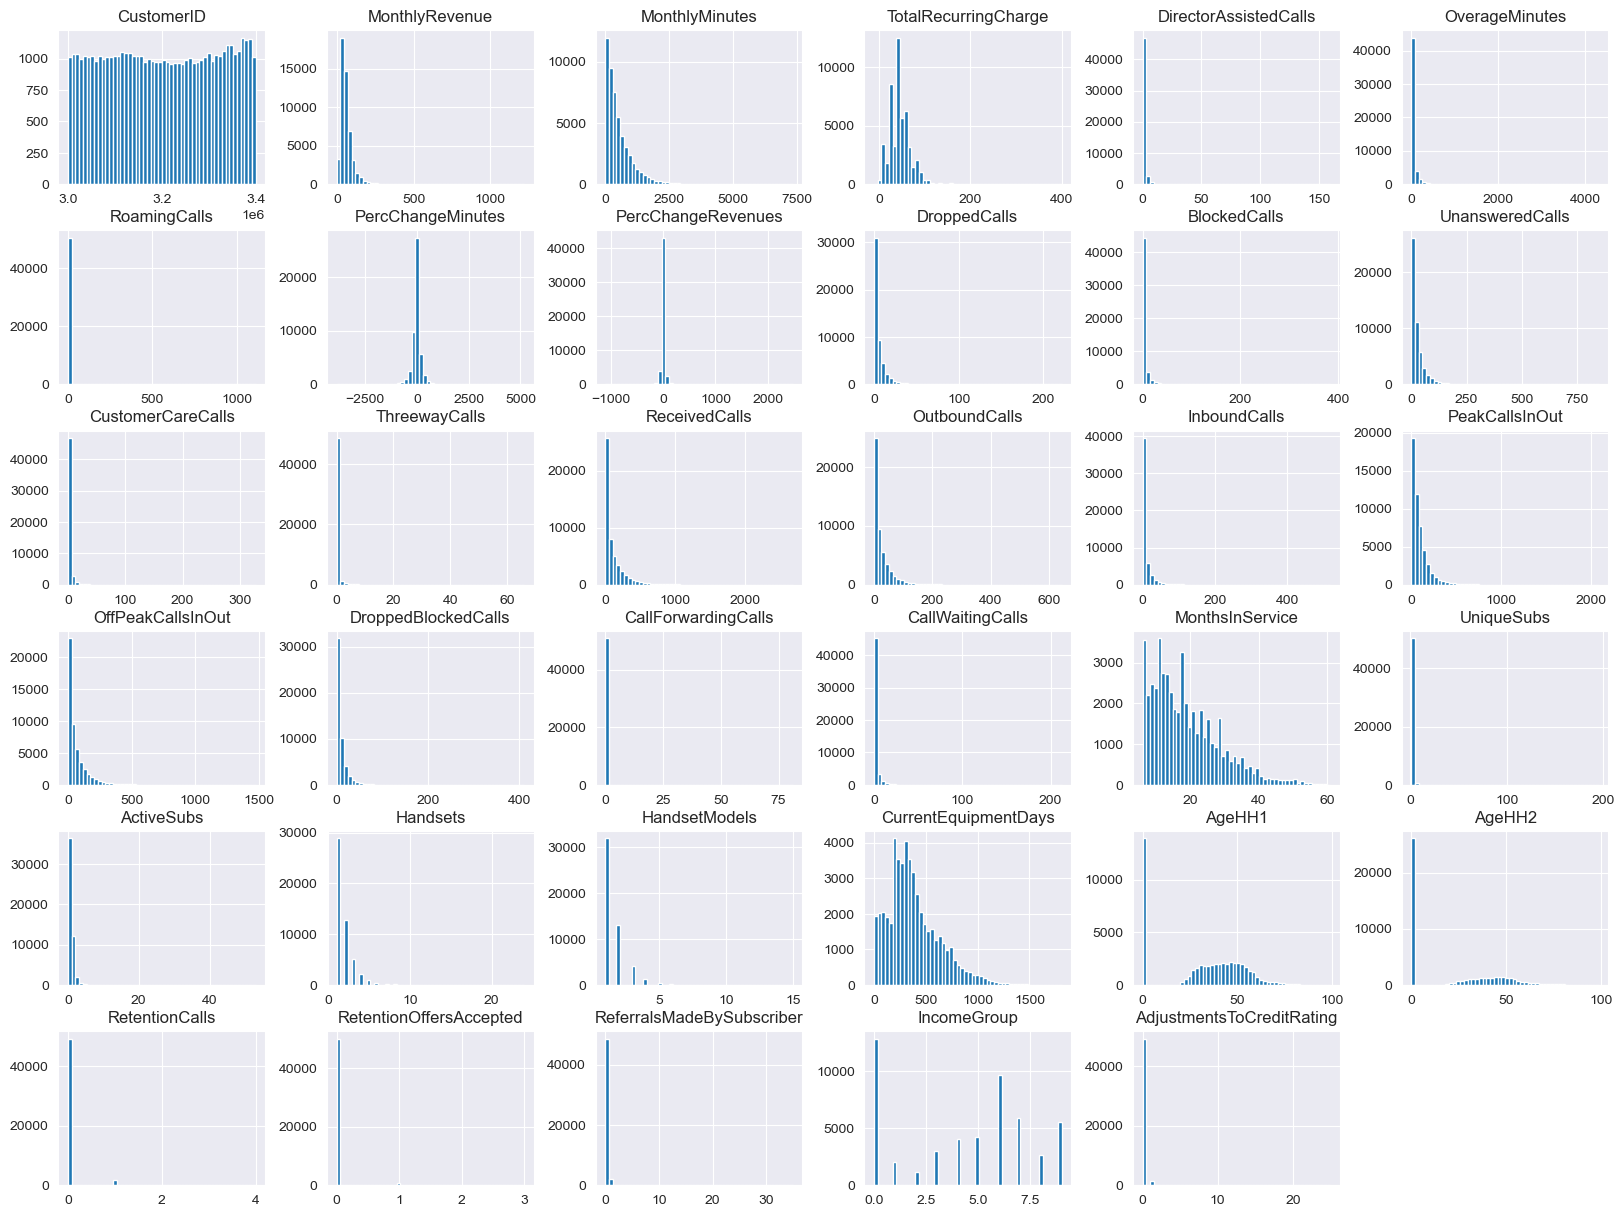

In [9]:
# only in a Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
full_df.hist(bins=50, figsize=(20,15))
plt.show()

We can get an initial idea of the distribution of the data from here. The numerical columns are of different scales. The columns are scaled later in the process.

In [10]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(full_df, test_size=0.2, random_state=42)

In [11]:
train_df = full_df.copy()

In [12]:
# drop the columns that are not required before progressing further
def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True)

In [13]:
# drop customer id column since it's useless
drop_columns(train_df, ['CustomerID'])

Perform one hot encoding on all the categorical columns

In [14]:
print(get_categorical_columns(train_df))

['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


In [15]:
# perform one hot encoding on the categorical columns
from sklearn.preprocessing import LabelBinarizer
def one_hot_encode(df, columns):
    for column in columns:
        lb = LabelBinarizer()
        lb_results = lb.fit_transform(df[column])
        lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
        df = df.join(lb_results_df)
        df.drop(column, axis=1, inplace=True)
    return df

In [16]:
# perform label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
def label_encode(df, columns):
    for column in columns:
        le = LabelEncoder()
        le_results = le.fit_transform(df[column])
        df[column] = le_results
    return df

In [17]:
train_df.shape

(51047, 57)

In [18]:
train_df = label_encode(train_df, get_categorical_columns(train_df))

In [19]:
train_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,0,0,8,1,0,2,4,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,0,0,8,0,3,2,4,2
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,0,0,15,0,2,3,1,2
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,0,0,0,0,3,0,3,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,0,1,0,0,0,0,4,2


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_df)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [23]:
pca.fit(scaled_df)


PCA(n_components=2)

In [24]:
pc_df = pca.transform(scaled_df)


Text(0, 0.5, 'Second Principal Component')

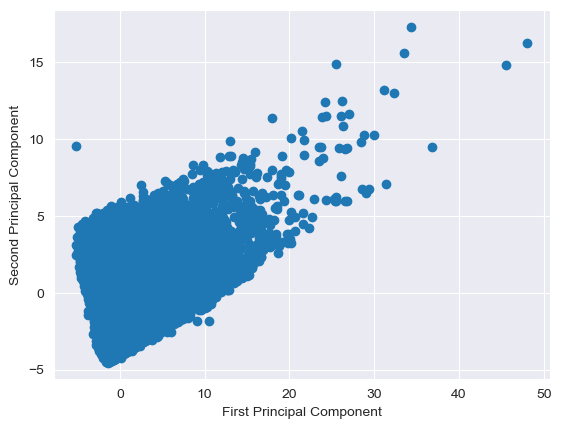

In [25]:
import matplotlib.pyplot as plt

plt.scatter(pc_df[:, 0], pc_df[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


In [26]:
print(pca.components_)


[[-1.46746434e-02  2.31032937e-01  2.86449951e-01  1.87482846e-01
   1.37693570e-01  1.82532877e-01  3.32391851e-02 -3.34146130e-02
  -2.35083168e-02  2.21876565e-01  1.31708289e-01  2.37852100e-01
   1.36553798e-01  1.14198672e-01  2.65137916e-01  2.51311575e-01
   2.14445432e-01  2.73424207e-01  2.71217108e-01  2.23663944e-01
   7.59168688e-03  2.21731348e-01 -2.13812999e-02 -1.34371600e-02
  -2.91552927e-02 -1.68606723e-03  1.37110818e-01  1.34729675e-01
  -1.32756661e-01 -1.15211729e-01 -1.05298325e-01 -5.96753710e-02
   4.20679151e-02  5.84576294e-02 -5.39160800e-02 -3.61911585e-02
   1.06663334e-01 -1.05140159e-01 -1.06180489e-01 -2.26937137e-02
  -4.18293833e-02 -7.73415096e-02 -1.00305861e-01  1.68324670e-02
   1.53020714e-02  7.04217918e-03  1.46055480e-02  2.03370005e-02
  -1.06756671e-01 -1.34370308e-02  1.95153360e-02 -1.11945133e-01
   1.62122689e-02  1.07849127e-01 -5.33626056e-02 -3.50738149e-02
  -7.24067992e-02]
 [-1.56324379e-02  8.68296340e-02  8.65377383e-02  5.8077

In [20]:
# drop the null values
train_df.dropna(inplace=True)
train_df.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

In [60]:
X = train_df.drop("Churn",axis=1)   #Feature Matrix
y = train_df["Churn"]

In [61]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

X_train.shape, X_test.shape

((39820, 56), (9956, 56))

In [62]:
# corr_matrix = train_df.corr()
X_train.corr()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
MonthlyRevenue,1.000000,0.713953,0.634657,0.410614,0.789179,0.287249,-0.022302,0.004016,0.426778,0.232247,...,0.018847,-0.080733,-0.009542,0.035425,-0.185032,0.014241,0.141199,-0.050650,-0.032909,-0.077418
MonthlyMinutes,0.713953,1.000000,0.585982,0.394650,0.569123,0.109428,-0.050978,-0.037702,0.589786,0.313344,...,0.067429,-0.148017,-0.014860,0.044800,-0.228479,0.011363,0.207140,-0.080105,-0.044218,-0.113588
TotalRecurringCharge,0.634657,0.585982,1.000000,0.308552,0.200628,0.079888,-0.023959,-0.027789,0.350885,0.171622,...,0.037455,-0.075368,-0.011596,0.043457,-0.163481,-0.014731,0.136789,-0.037327,-0.023553,-0.068628
DirectorAssistedCalls,0.410614,0.394650,0.308552,1.000000,0.289755,0.075581,-0.033857,-0.017260,0.269780,0.135456,...,-0.002732,-0.016111,-0.005240,0.024099,-0.111463,0.013959,0.076403,-0.019869,-0.012193,-0.031211
OverageMinutes,0.789179,0.569123,0.200628,0.289755,1.000000,0.072210,-0.026805,-0.014981,0.321346,0.192612,...,0.008089,-0.051130,-0.008020,0.020869,-0.105907,0.010905,0.082618,-0.032615,-0.026017,-0.048669
RoamingCalls,0.287249,0.109428,0.079888,0.075581,0.072210,1.000000,-0.026872,-0.023066,0.078487,0.029539,...,-0.007812,-0.011132,0.016809,0.007888,-0.014418,-0.000198,0.008376,0.004967,-0.008902,0.003186
PercChangeMinutes,-0.022302,-0.050978,-0.023959,-0.033857,-0.026805,-0.026872,1.000000,0.598628,-0.093098,-0.058975,...,0.006812,0.013697,-0.003861,-0.005077,-0.002957,-0.028098,-0.035883,-0.001075,0.006787,-0.008828
PercChangeRevenues,0.004016,-0.037702,-0.027789,-0.017260,-0.014981,-0.023066,0.598628,1.000000,-0.040930,-0.031195,...,0.002041,0.004771,0.001760,-0.007186,0.011835,-0.020278,-0.021275,-0.001557,0.004953,-0.003209
DroppedCalls,0.426778,0.589786,0.350885,0.269780,0.321346,0.078487,-0.093098,-0.040930,1.000000,0.184308,...,0.027167,-0.097581,-0.014671,0.029145,-0.167903,0.022808,0.197726,-0.085831,-0.038366,-0.087222
BlockedCalls,0.232247,0.313344,0.171622,0.135456,0.192612,0.029539,-0.058975,-0.031195,0.184308,1.000000,...,0.025694,-0.066582,-0.000493,0.006642,-0.083329,0.014512,0.094617,0.004783,-0.022051,-0.021586


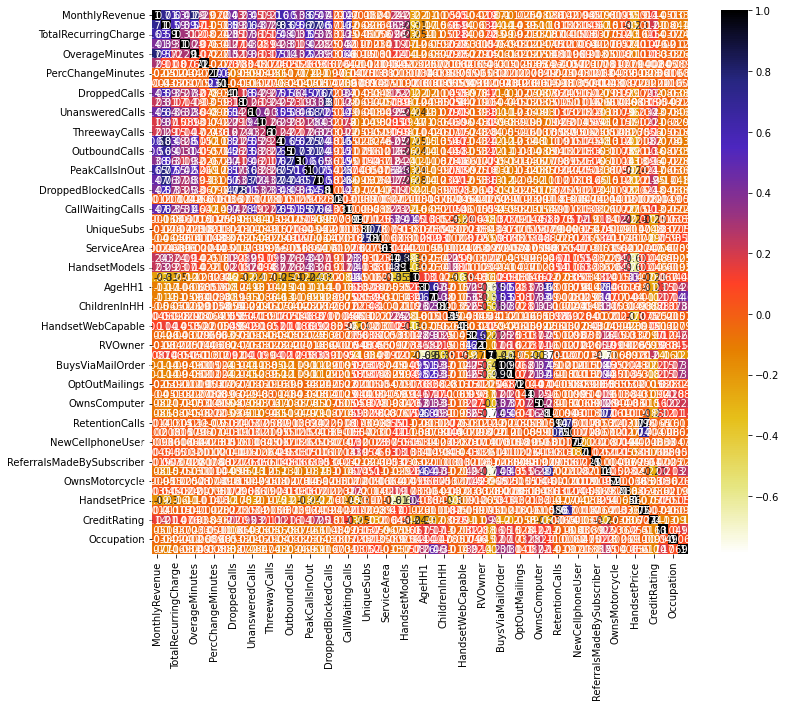

In [63]:
# corr_matrix["Churn"].sort_values(ascending=False)
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [64]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [65]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

10

In [66]:
# the below are the columns that are highly correlated and can be removed
corr_features

{'ActiveSubs',
 'DroppedBlockedCalls',
 'HandsetModels',
 'HasCreditCard',
 'MadeCallToRetentionTeam',
 'OffPeakCallsInOut',
 'OverageMinutes',
 'PeakCallsInOut',
 'ReceivedCalls',
 'RespondsToMailOffers'}

In [67]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,CreditRating,PrizmCode,Occupation,MaritalStatus
19056,38.42,259.0,34.0,2.97,1.0,-25.0,-0.6,3.0,0.7,16.3,...,0,0,9,0,0,15,2,2,3,1
5089,34.99,54.0,45.0,0.00,0.0,-36.0,0.0,0.0,0.0,4.0,...,0,0,7,0,0,8,0,3,3,2
46504,63.60,294.0,40.0,13.61,0.0,-238.0,-30.3,4.3,1.0,28.0,...,0,0,6,0,0,15,4,0,3,2
33891,62.98,136.0,60.0,0.00,0.3,44.0,4.4,0.0,0.0,0.0,...,0,0,6,0,0,2,1,0,3,0
3828,31.08,84.0,30.0,0.74,0.0,0.0,-1.1,0.0,1.0,15.0,...,1,0,7,1,0,15,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,132.46,1148.0,105.0,3.46,1.1,390.0,103.8,4.7,9.0,35.3,...,1,0,8,0,0,1,2,0,4,2
22815,50.09,205.0,50.0,0.00,0.0,-91.0,-0.1,0.0,0.7,5.0,...,0,0,0,0,0,3,4,0,3,1
31908,52.04,250.0,30.0,1.98,3.0,65.0,25.2,7.0,1.7,20.0,...,0,0,8,0,0,15,0,3,3,0
12463,33.91,314.0,45.0,1.73,0.3,132.0,1.8,2.0,4.7,53.3,...,0,0,6,0,0,15,1,3,3,0


In [68]:
# create a new copy of the datsset without the highly correlated columns
train_df = train_df.drop(corr_features,axis=1)

In [69]:
# add all the column names to a list
columns = []
for column in train_df:
    columns.append(column)

In [70]:
# perform min max scaling on the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[columns] = scaler.fit_transform(train_df[columns])


In [71]:
for column in train_df:
    print(f'{column}: {train_df[column].unique()}')

Churn: [1. 0.]
MonthlyRevenue: [0.02453743 0.01883616 0.03592371 ... 0.02706681 0.10424139 0.4400797 ]
MonthlyMinutes: [0.02975948 0.00135888 0.0010871  ... 0.45658377 0.64125561 0.33115912]
TotalRecurringCharge: [0.06896552 0.05665025 0.10837438 0.19950739 0.14285714 0.08866995
 0.1773399  0.10098522 0.07635468 0.22413793 0.10591133 0.16256158
 0.18719212 0.26108374 0.13793103 0.15024631 0.18226601 0.06403941
 0.12561576 0.38423645 0.21921182 0.06157635 0.18965517 0.05172414
 0.15763547 0.23399015 0.24876847 0.20689655 0.21182266 0.2044335
 0.46551724 0.53940887 0.22906404 0.08128079 0.28078818 0.09359606
 0.16009852 0.0270936  0.11330049 0.03940887 0.27339901 0.27832512
 0.19704433 0.26600985 0.35960591 0.16995074 0.24384236 0.51231527
 0.13546798 0.13300493 0.21428571 0.15517241 0.07389163 0.06650246
 0.13054187 0.25369458 0.408867   0.28571429 0.21674877 0.1182266
 0.10344828 0.20197044 0.0320197  0.50738916 0.52463054 0.091133
 0.29802956 0.24137931 0.2635468  0.23891626 0.2364532

In [72]:
X = train_df.drop("Churn",axis=1)   #Feature Matrix
y = train_df["Churn"]

In [73]:
# split the data and handle the imbalances in only the training data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to only the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [74]:
# check the shape of the data
X_train.shape, y_train.shape

((39820, 46), (39820,))

In [75]:
# check the shape of the resampled data
X_train_resampled.shape, y_train_resampled.shape

((56814, 46), (56814,))

In [76]:
# check the distribution of the target variable in the resampled data
y_train_resampled.value_counts()

0.0    28407
1.0    28407
Name: Churn, dtype: int64

In [77]:
# check the distribution of the target variable in the original data
y_train.value_counts()

0.0    28407
1.0    11413
Name: Churn, dtype: int64

In [78]:
# create a baseline rf model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [81]:
y_pred = rf.predict(X_test)

In [80]:
#helper function to print classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, f1_score,accuracy_score,roc_curve

clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.82      7112
         1.0       0.46      0.17      0.25      2844

    accuracy                           0.71      9956
   macro avg       0.60      0.55      0.53      9956
weighted avg       0.66      0.71      0.65      9956

ROC_AUC_Score: 0.5453
F1 Score: 0.2480


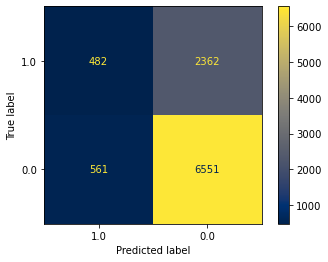

In [82]:

clf = "Random Forest"
model_eval(clf,y_test, y_pred)

In [86]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

# Define the model in a function
def create_model(num_filters, kernel_size, pool_size, fc1_units, fc2_units):
    input_layer = Input(shape=(46, 1))
    conv_layer = Conv1D(num_filters, kernel_size, activation='relu')(input_layer)
    max_pooling_layer = MaxPooling1D(pool_size=pool_size)(conv_layer)
    flatten_layer = Flatten()(max_pooling_layer)
    dropout_layer = Dropout(rate=0.5)(flatten_layer)
    fc1 = Dense(fc1_units, activation='relu')(dropout_layer)
    fc2 = Dense(fc2_units, activation='relu')(fc1)
    output_layer = Dense(1, activation='sigmoid')(fc2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [87]:
model = create_model(512, 2, 2, 2048, 1024)

In [88]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 46, 1)]           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 45, 512)           1536      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11264)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11264)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              23070720  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098

In [91]:
model.fit(X_train_resampled, y_train_resampled, epochs=30, batch_size=128,validation_data=(X_test, y_test))

Epoch 1/30
444/444 [==============================] - 6s 13ms/step - loss: 0.6531 - accuracy: 0.6140 - val_loss: 0.6664 - val_accuracy: 0.5578
Epoch 2/30
444/444 [==============================] - 5s 12ms/step - loss: 0.6462 - accuracy: 0.6254 - val_loss: 0.6993 - val_accuracy: 0.5182
Epoch 3/30
444/444 [==============================] - 6s 13ms/step - loss: 0.6417 - accuracy: 0.6322 - val_loss: 0.6781 - val_accuracy: 0.5510
Epoch 4/30
444/444 [==============================] - 7s 16ms/step - loss: 0.6384 - accuracy: 0.6350 - val_loss: 0.6979 - val_accuracy: 0.5328
Epoch 5/30
444/444 [==============================] - 7s 15ms/step - loss: 0.6362 - accuracy: 0.6386 - val_loss: 0.6833 - val_accuracy: 0.5482
Epoch 6/30
444/444 [==============================] - 6s 14ms/step - loss: 0.6332 - accuracy: 0.6411 - val_loss: 0.6854 - val_accuracy: 0.5473
Epoch 7/30
444/444 [==============================] - 6s 13ms/step - loss: 0.6307 - accuracy: 0.6431 - val_loss: 0.6582 - val_accuracy: 0.5851

In [92]:
model.evaluate(X_test, y_test)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

312/312 [==============================] - 2s 4ms/step - loss: 0.7074 - accuracy: 0.5980
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.70      7112
         1.0       0.35      0.49      0.41      2844

    accuracy                           0.60      9956
   macro avg       0.56      0.56      0.55      9956
weighted avg       0.64      0.60      0.61      9956



              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      7112
         1.0       0.59      0.06      0.10      2844

    accuracy                           0.72      9956
   macro avg       0.66      0.52      0.47      9956
weighted avg       0.69      0.72      0.63      9956

ROC_AUC_Score: 0.5205
F1 Score: 0.1033


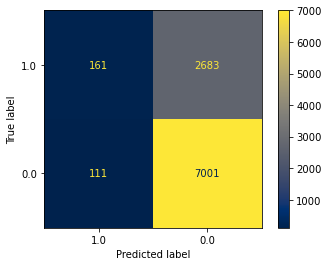

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Fit the optimized model to the data
rf_opt = RandomForestClassifier(**best_params).fit(X_train, y_train)

y_pred = rf_opt.predict(X_test)
clf = "Random Forest"
model_eval(clf,y_test, y_pred)